In [2]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sequential time

In [3]:
inputs = ["100-100-10", "500-500-10", "1000-1000-10", "5000-5000-10", "10000-10000-10" , "15000-15000-10"] 


files = list(glob.glob("*.csv"))
files.sort(key = lambda x: x.split("-", 1)[0])

times_sequential={}
for f in files:
    
    csv = pd.read_csv(f, header=None, names=["Thread","Time"])
    times_sequential[csv.iloc[0]["Thread"]] = csv.iloc[1]["Time"]
print(times_sequential)

{'100-100-10': 18.555, '1000-1000-10': 1871.702, '10000-10000-10': 186158.108, '15000-15000-10': 416311.409, '500-500-10': 469.746, '5000-5000-10': 45914.281}


# Compare results OpenMP

Speedup

100-100-10
2 :  0.1463074230023182
4 :  0.17826262393359465
8 :  0.13883900511807487
16 :  0.10897270249953017
32 :  0.10749044143204727
64 :  0.12068371176397895
128 :  0.05276208295774768
256 :  0.06876424481627662

500-500-10
2 :  1.3576003144399615
4 :  3.888078664426364
8 :  4.325708602685231
16 :  4.7195474822167744
32 :  4.601743730407524
64 :  2.6805560310884378
128 :  2.217990547195558
256 :  1.6862945000664111

1000-1000-10
2 :  2.602524795359204
4 :  4.469714771511539
8 :  7.866442515813143
16 :  9.937994456774522
32 :  18.2194469050238
64 :  17.5056303778526
128 :  12.30217425596803
256 :  7.3169379681318505

5000-5000-10
2 :  3.3993745319447375
4 :  6.639421355570839
8 :  8.693280215420264
16 :  22.116588495918375
32 :  28.12413464023943
64 :  55.96599812773344
128 :  51.46163993884807
256 :  55.165409911306234

10000-10000-10
2 :  2.6321628686274385
4 :  6.4929209491396405
8 :  10.100888258873162
16 :  23.339112756165854
32 :  32.810678031374565
64 :  39.58165574

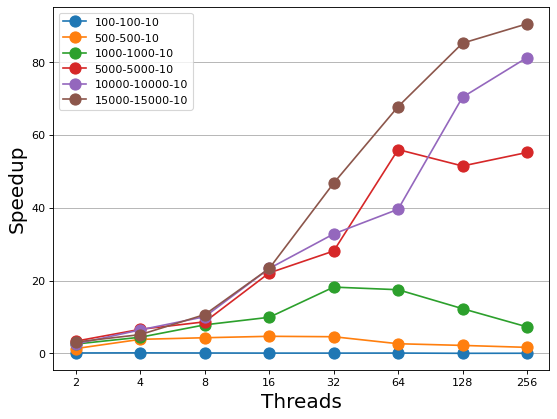

In [4]:
folder = "OpenMP"
plt.figure(figsize=(8, 6), dpi=80)


files = glob.glob(os.path.join("./", folder, "Results", "*.csv"))

times_openmp = {}
for f in files:
    csv = pd.read_csv(f, header=None, names=["Thread","Time"])
    times_openmp[csv.iloc[0]["Thread"]] = csv
    #print(csv)
    
print("Speedup")
for key in inputs:
    
    # compute speedup
    speedup = times_sequential[key]/times_openmp[key]['Time'][1:].to_numpy()
    plt.plot(times_openmp[key]['Thread'][1:], speedup, markersize=10, marker='o', label= key)
    
    print()
    print(key)
    for threads, sd in zip(times_openmp[key]['Thread'][1:], speedup):
        print(threads, ": ",  sd)
        
plt.grid(axis='y')
plt.xlabel('Threads', fontsize=18)
plt.ylabel('Speedup', fontsize=18)
plt.legend()

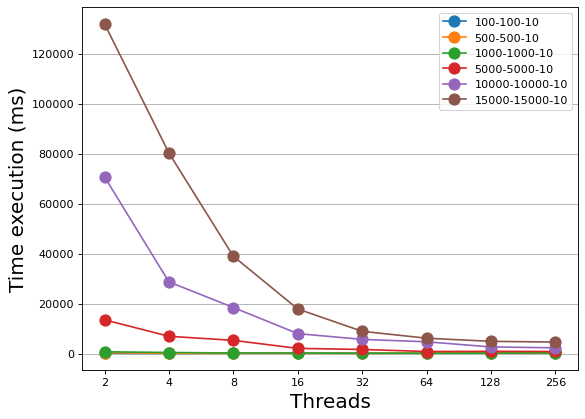

In [6]:
folder = "OpenMP"
plt.figure(figsize=(8, 6), dpi=80)
plt.tight_layout()


files = glob.glob(os.path.join("./", folder, "Results", "*.csv"))

times_openmp = {}
for f in files:
    csv = pd.read_csv(f, header=None, names=["Thread","Time"])
    times_openmp[csv.iloc[0]["Thread"]] = csv
    #print(csv)
    
for key in inputs:
    
    # compute speedup
    plt.plot(times_openmp[key]['Thread'][1:], times_openmp[key]['Time'][1:].to_numpy(), markersize=10, marker='o', label= key)

plt.grid(axis='y')
plt.xlabel('Threads', fontsize=18)
plt.ylabel('Time execution (ms)', fontsize=18)
plt.legend()

# Compare results MPI

In [7]:
folder = "MPI"

files = glob.glob(os.path.join(folder, "MPI_Results","experiment_V2", "Node-1", "*.csv"))

node1 = {}
for f in files:
    csv = pd.read_csv(f, header=None, names=['Thread','Time'])
    node1[csv.iloc[0]["Thread"]] = csv
    


In [8]:
files = glob.glob(os.path.join(folder, "MPI_Results","experiment_V2", "Node-2", "*.csv"))

node2 = {}
for f in files:
    csv = pd.read_csv(f, header=None, names=['Thread','Time'])
    node2[csv.iloc[0]["Thread"]] = csv

In [9]:
files = glob.glob(os.path.join(folder, "MPI_Results","experiment_V2", "Node-4", "*.csv"))

node4 = {}
for f in files:
    csv = pd.read_csv(f, header=None, names=['Thread','Time'])
    node4[csv.iloc[0]["Thread"]] = csv


In [10]:
files = glob.glob(os.path.join(folder, "MPI_Results","experiment_V2", "Node-8", "*.csv"))

node8 = {}
for f in files:
    csv = pd.read_csv(f, header=None, names=['Thread','Time'])
    node8[csv.iloc[0]["Thread"]] = csv


100-100-10
2 :  0.009233736704887186
4 :  0.009256409271474943
8 :  0.00925470104397816
16 :  0.009259310085337355
32 :  0.00926289241865578
64 :  0.009226124326686845
128 :  0.009181757226520457
256 :  0.00910824154732604

100-100-10
2 :  0.009232349196255712
4 :  0.009227766950022852
8 :  0.009245763915360524
16 :  0.009255725904808937
32 :  0.00926224508234937
64 :  0.009244810350600277
128 :  0.009219871195095057

100-100-10
4 :  0.009249589364093846
8 :  0.009253173407112701
16 :  0.009255587396837987
32 :  0.009256136836182092
64 :  0.009243953692051545
128 :  0.009201878958717262
256 :  0.009199953591179944

100-100-10
8 :  0.009226821681912098
16 :  0.009255010324910468
32 :  0.009238159298626798
64 :  0.009240128301086257
128 :  0.009214097793085777
256 :  0.009198539734915486
512 :  0.009095017567525175


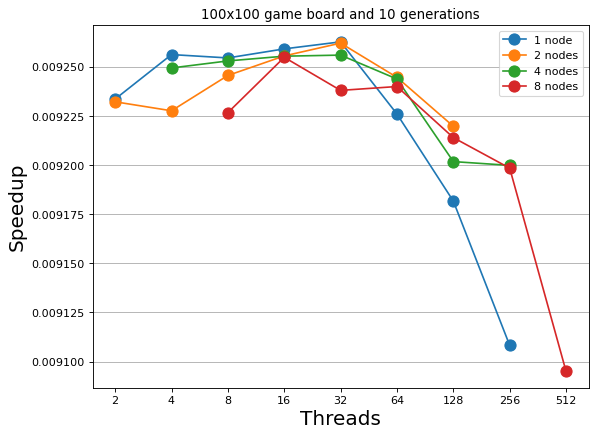

In [11]:
# 100-100-10

plt.figure(figsize=(8, 6), dpi=80)

#print(times_sequential["100-100-10"])
for execution, label in zip([node1, node2, node4, node8], ["1 node", "2 nodes", "4 nodes", "8 nodes"]): 
    
    # compute speedup
    speedup = times_sequential["100-100-10"]/execution["100-100-10"]['Time'][1:].to_numpy()  
    
    plt.plot(execution["100-100-10"]['Thread'].tolist()[1:], speedup, marker='o', markeredgecolor=None, markersize=10, label = label)
    
    print()
    print("100-100-10")
    for threads, sd in zip(execution["100-100-10"]['Thread'].tolist()[1:], speedup):
        print(threads, ": ",  sd)
        
plt.title("100x100 game board and 10 generations")
plt.grid(axis='y')
plt.xlabel('Threads', fontsize=18)
plt.ylabel('Speedup', fontsize=18)
plt.legend()

469.746

500-500-10
2 :  0.21505601804883587
4 :  0.22422799993126322
8 :  0.22899079885442689
16 :  0.23078464992655112
32 :  0.22936715610136477
64 :  0.2289778507436786
128 :  0.22312343165097545
256 :  0.2116049226999171

500-500-10
2 :  0.21716132253411738
4 :  0.2237249000909195
8 :  0.22803181744483741
16 :  0.23121813494098778
32 :  0.23042024399492017
64 :  0.2311949200174425
128 :  0.22776436042883583

500-500-10
4 :  0.22541070924722018
8 :  0.22931486627131584
16 :  0.22852247468961298
32 :  0.22972093375813932
64 :  0.22946205527457034
128 :  0.22702036555543742
256 :  0.22161541201474774

500-500-10
8 :  0.2288618296142665
16 :  0.23013272610763494
32 :  0.23072298565698776
64 :  0.23089650046892418
128 :  0.22797593019582071
256 :  0.22037569508657706
512 :  0.208132454450838


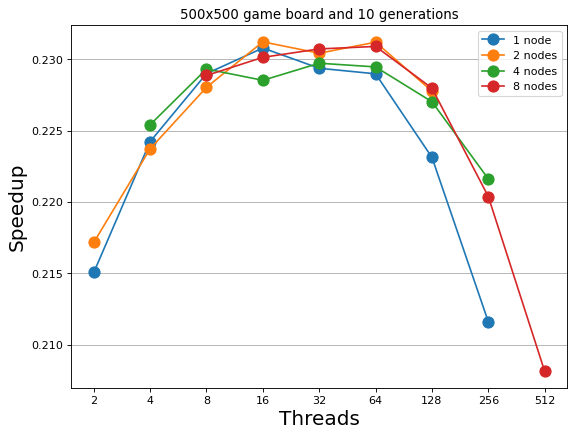

In [12]:
# 500-500-10

plt.figure(figsize=(8, 6), dpi=80)

print(times_sequential["500-500-10"])
for execution, label in zip([node1, node2, node4, node8], ["1 node", "2 nodes", "4 nodes", "8 nodes"]): 
    
    # compute speedup
    speedup = times_sequential["500-500-10"]/execution["500-500-10"]['Time'][1:].to_numpy()  
    
    plt.plot(execution["500-500-10"]['Thread'].tolist()[1:], speedup, marker='o', markeredgecolor=None, markersize=10, label = label)
    
    print()
    print("500-500-10")
    for threads, sd in zip(execution["500-500-10"]['Thread'].tolist()[1:], speedup):
        print(threads, ": ",  sd)
        
plt.title("500x500 game board and 10 generations")
plt.grid(axis='y')
plt.xlabel('Threads', fontsize=18)
plt.ylabel('Speedup', fontsize=18)
plt.legend()

1871.702

1000-1000-10
2 :  0.7220401189549891
4 :  0.8013705961485271
8 :  0.842739266646075
16 :  0.8739716240856741
32 :  0.8969193199962431
64 :  0.8743578496154688
128 :  0.8482493234905035
256 :  0.7745177838478228

1000-1000-10
2 :  0.7084984519948051
4 :  0.7812743143560306
8 :  0.844971371586113
16 :  0.8700685938903279
32 :  0.8856601939772143
64 :  0.8902958945211924
128 :  0.8854310162127795

1000-1000-10
4 :  0.8144187248662652
8 :  0.8519163659982094
16 :  0.8685190598826013
32 :  0.880139490462932
64 :  0.8050192684857035
128 :  0.8682777205379911
256 :  0.8413837932311764

1000-1000-10
8 :  0.8606495904136328
16 :  0.8760373592067605
32 :  0.8819314735689421
64 :  0.803693628898073
128 :  0.8443812862172958
256 :  0.8327284116824771
512 :  0.748710149437858


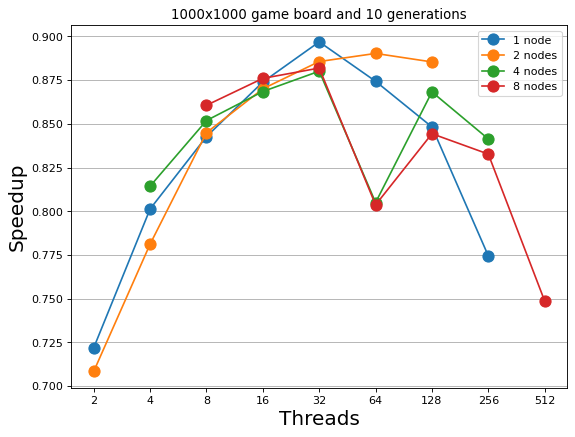

In [13]:
# 1000-1000-10

plt.figure(figsize=(8, 6), dpi=80)

print(times_sequential["1000-1000-10"])
for execution, label in zip([node1, node2, node4, node8], ["1 node", "2 nodes", "4 nodes", "8 nodes"]): 
    
    # compute speedup
    speedup = times_sequential["1000-1000-10"]/execution["1000-1000-10"]['Time'][1:].to_numpy()  
    
    plt.plot(execution["1000-1000-10"]['Thread'].tolist()[1:], speedup, marker='o', markeredgecolor=None, markersize=10, label = label)
    
    print()
    print("1000-1000-10")
    for threads, sd in zip(execution["1000-1000-10"]['Thread'].tolist()[1:], speedup):
        print(threads, ": ",  sd)
        
plt.title("1000x1000 game board and 10 generations")
plt.grid(axis='y')
plt.xlabel('Threads', fontsize=18)
plt.ylabel('Speedup', fontsize=18)
plt.legend()


45914.281

5000-5000-10
2 :  3.260950046136259
4 :  6.3304869249924485
8 :  8.599363582815238
16 :  17.123836948235713
32 :  24.250607264996766
64 :  38.03571511412136
128 :  40.57684357322196
256 :  13.74832196879413

5000-5000-10
2 :  3.2394270015460456
4 :  6.204343311021311
8 :  11.354331158464086
16 :  17.13890927415592
32 :  21.86603622537205
64 :  45.18548432334871
128 :  57.874074176779935

5000-5000-10
4 :  7.413728538159058
8 :  11.667241207567576
16 :  15.399322439325754
32 :  29.980627046651414
64 :  29.52001561052386
128 :  43.981766175993044
256 :  53.200270900971674

5000-5000-10
8 :  13.500932274334772
16 :  18.38352235645894
32 :  20.275789052536382
64 :  38.32158670462579
128 :  49.44510661852204
256 :  45.02018022081462
512 :  25.239969545547


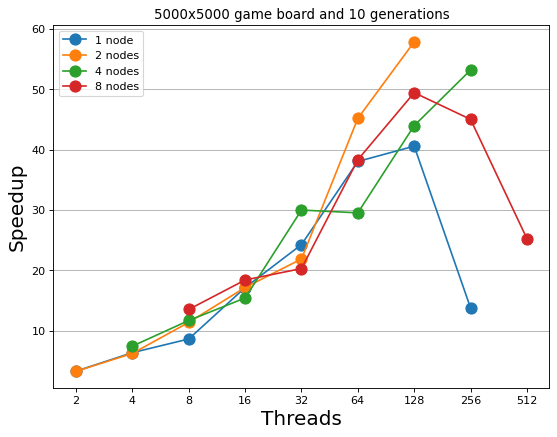

In [14]:
# 5000-5000-10

plt.figure(figsize=(8, 6), dpi=80)

print(times_sequential["5000-5000-10"])
for execution, label in zip([node1, node2, node4, node8], ["1 node", "2 nodes", "4 nodes", "8 nodes"]): 
    
    # compute speedup
    speedup = times_sequential["5000-5000-10"]/execution["5000-5000-10"]['Time'][1:].to_numpy()  
    
    plt.plot(execution["5000-5000-10"]['Thread'].tolist()[1:], speedup, marker='o', markeredgecolor=None, markersize=10, label = label)
    
    print()
    print("5000-5000-10")
    for threads, sd in zip(execution["5000-5000-10"]['Thread'].tolist()[1:], speedup):
        print(threads, ": ",  sd)
        
plt.title("5000x5000 game board and 10 generations")
plt.grid(axis='y')
plt.xlabel('Threads', fontsize=18)
plt.ylabel('Speedup', fontsize=18)
plt.legend()

186158.108

10000-10000-10
2 :  3.069919715242593
4 :  6.824799393915287
8 :  12.161135904492044
16 :  17.303853399847632
32 :  26.020806792986836
64 :  41.59054346184472
128 :  44.176818230574206
256 :  46.90610997598986

10000-10000-10
2 :  3.2832021691082884
4 :  7.18466541546109
8 :  11.979605376874263
16 :  17.30159705884731
32 :  33.08505216156035
64 :  37.11994254087154
128 :  62.546801549977644

10000-10000-10
4 :  6.58108743252293
8 :  12.008465099237272
16 :  20.273398310656397
32 :  33.49716352651559
64 :  47.09096216697528
128 :  61.126333088707305
256 :  68.19717742290007

10000-10000-10
8 :  11.567567184660664
16 :  20.41888401811218
32 :  32.850495550597266
64 :  48.802626811831665
128 :  56.83663423318462
256 :  67.84454635969638
512 :  42.14901194702067


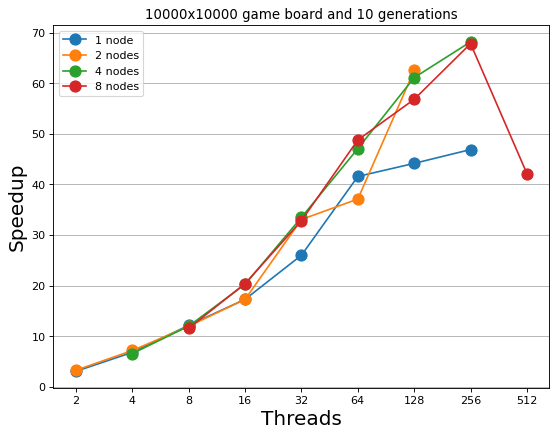

In [15]:
# 10000-10000-10

plt.figure(figsize=(8, 6), dpi=80)

print(times_sequential["10000-10000-10"])
for execution, label in zip([node1, node2, node4, node8], ["1 node", "2 nodes", "4 nodes", "8 nodes"]): 
    
    # compute speedup
    speedup = times_sequential["10000-10000-10"]/execution["10000-10000-10"]['Time'][1:].to_numpy()  
    
    plt.plot(execution["10000-10000-10"]['Thread'].tolist()[1:], speedup, marker='o', markeredgecolor=None, markersize=10, label = label)
    
    print()
    print("10000-10000-10")
    for threads, sd in zip(execution["10000-10000-10"]['Thread'].tolist()[1:], speedup):
        print(threads, ": ",  sd)
    
plt.title("10000x10000 game board and 10 generations")
plt.grid(axis='y')
plt.xlabel('Threads', fontsize=18)
plt.ylabel('Speedup', fontsize=18)
plt.legend()

186158.108


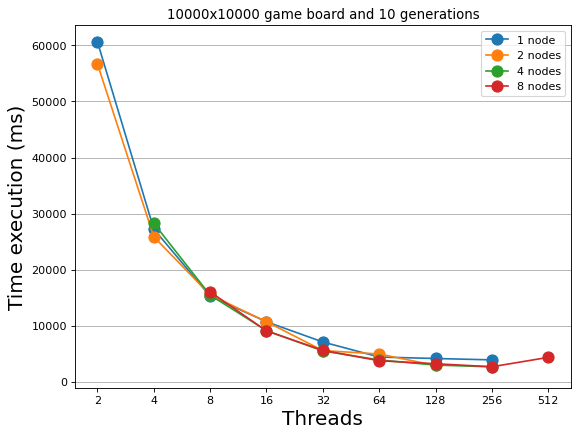

In [17]:
# 10000-10000-10


plt.figure(figsize=(8, 6), dpi=80)

print(times_sequential["10000-10000-10"])
for execution, label in zip([node1, node2, node4, node8], ["1 node", "2 nodes", "4 nodes", "8 nodes"]): 
    
    # compute speedup    
    plt.plot(execution["10000-10000-10"]['Thread'].tolist()[1:], execution["10000-10000-10"]['Time'][1:].to_numpy()  , marker='o', markeredgecolor=None, markersize=10, label = label)
    
    
        
plt.title("10000x10000 game board and 10 generations")
plt.grid(axis='y')
plt.xlabel('Threads', fontsize=18)
plt.ylabel('Time execution (ms)', fontsize=18)
plt.ylim(ymin=-1000)
plt.legend()

416311.409

15000-15000-10
2 :  3.662253852351472
4 :  5.755335636086511
8 :  12.75676527450547
16 :  18.9134822082982
32 :  26.422495291618795
64 :  43.25145726820145
128 :  46.757014174186274
256 :  45.20585245009983

15000-15000-10
2 :  3.9108984499494714
4 :  6.934035313409473
8 :  11.263917889668795
16 :  19.452869693923116
32 :  34.11489586965402
64 :  42.56475191196178
128 :  48.44312609366408

15000-15000-10
4 :  6.710299271145753
8 :  11.34860315145044
16 :  19.147116561443195
32 :  31.166648736789625
64 :  42.26372746723864
128 :  62.06914474253118
256 :  57.06286173031841

15000-15000-10
8 :  11.42440096808648
16 :  20.40025891889039
32 :  31.258151467760122
64 :  42.67570561110182
128 :  56.7989089942148
256 :  67.5016573367329
512 :  49.172024967317974


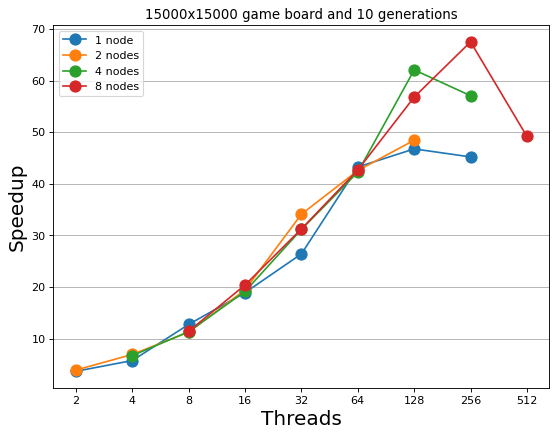

In [18]:
# 15000-15000-10

plt.figure(figsize=(8, 6), dpi=80)

print(times_sequential["15000-15000-10"])
for execution, label in zip([node1, node2, node4, node8], ["1 node", "2 nodes", "4 nodes", "8 nodes"]): 
    
    # compute speedup
    speedup = times_sequential["15000-15000-10"]/execution["15000-15000-10"]['Time'][1:].to_numpy()  
    
    plt.plot(execution["15000-15000-10"]['Thread'].tolist()[1:], speedup, marker='o', markeredgecolor=None, markersize=10, label = label)
    
    print()
    print("15000-15000-10")
    for threads, sd in zip(execution["15000-15000-10"]['Thread'].tolist()[1:], speedup):
        print(threads, ": ",  sd)
    
plt.title("15000x15000 game board and 10 generations")
plt.grid(axis='y')
plt.xlabel('Threads', fontsize=18)
plt.ylabel('Speedup', fontsize=18)
plt.legend()


416311.409


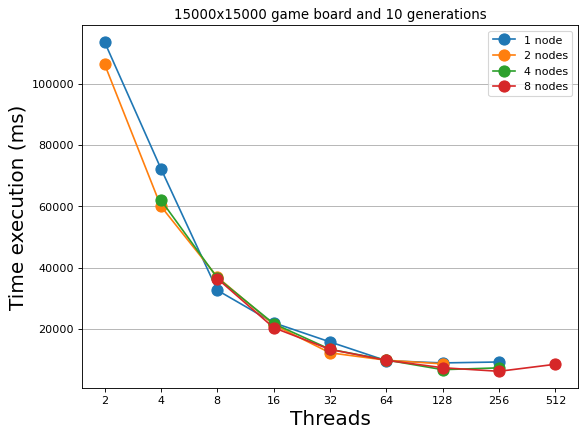

In [19]:
# 15000-15000-10


plt.figure(figsize=(8, 6), dpi=80)

print(times_sequential["15000-15000-10"])
for execution, label in zip([node1, node2, node4, node8], ["1 node", "2 nodes", "4 nodes", "8 nodes"]): 
    
    # compute speedup    
    plt.plot(execution["15000-15000-10"]['Thread'].tolist()[1:], execution["15000-15000-10"]['Time'][1:].to_numpy()  , marker='o', markeredgecolor=None, markersize=10, label = label)
    
    
        
plt.title("15000x15000 game board and 10 generations")
plt.grid(axis='y')
plt.xlabel('Threads', fontsize=18)
plt.ylabel('Time execution (ms)', fontsize=18)
plt.legend()

# Compare CUDA

Speedup

100-100-10
32 :  28.15629742033384
64 :  30.72019867549669
128 :  27.77694610778443
256 :  26.356534090909093
512 :  28.07110438729198
1024 :  30.07293354943274

500-500-10
32 :  499.1987247608927
64 :  543.6875
128 :  603.0115532734275
256 :  588.6541353383458
512 :  530.7864406779661
1024 :  495.5126582278481

1000-1000-10
32 :  955.9254341164453
64 :  1275.8704839809134
128 :  1285.5096153846155
256 :  1254.4919571045577
512 :  1146.1739130434783
1024 :  974.3373243102551

5000-5000-10
32 :  1266.670740454646
64 :  2202.757676069852
128 :  2207.94811252705
256 :  2087.6770336016007
512 :  1752.787974804352
1024 :  1350.976313776261

10000-10000-10
32 :  1314.5552173882343
64 :  2227.3311238468996
128 :  2225.4406216377765
256 :  2114.3038150078937
512 :  1799.950765779703
1024 :  1376.6545239415789

15000-15000-10
32 :  1352.91230196773
64 :  2243.2384567718295
128 :  2242.283959195105
256 :  2124.764123450363
512 :  1781.6516266808178
1024 :  1410.054053413267


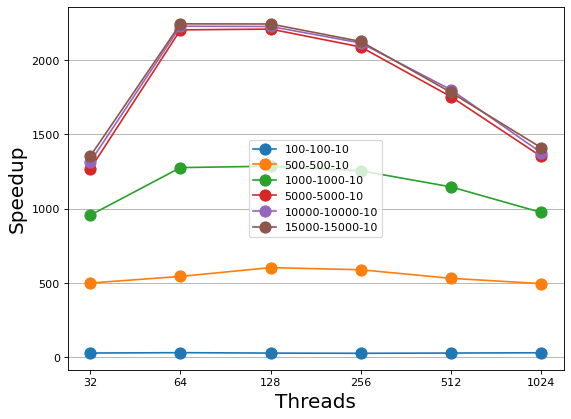

In [20]:
folder = "CUDA"
plt.figure(figsize=(8, 6), dpi=80)


files = glob.glob(os.path.join("./", folder, "Results", "*.csv"))

times_openmp = {}
for f in files:
    csv = pd.read_csv(f, header=None, names=["Thread","Time"])
    times_openmp[csv.iloc[0]["Thread"]] = csv
    #print(csv)
    
print("Speedup")
for key in inputs:
    
    # compute speedup
    speedup = times_sequential[key]/times_openmp[key]['Time'][1:].to_numpy()
    plt.plot(times_openmp[key]['Thread'][1:], speedup, markersize=10, marker='o', label= key)
    
    print()
    print(key)
    for threads, sd in zip(times_openmp[key]['Thread'][1:], speedup):
        print(threads, ": ",  sd)
        
plt.grid(axis='y')
plt.xlabel('Threads', fontsize=18)
plt.ylabel('Speedup', fontsize=18)
plt.legend()

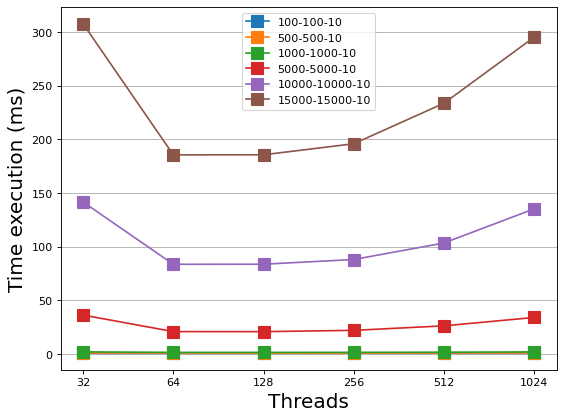

In [37]:
folder = "CUDA"
plt.figure(figsize=(8, 6), dpi=80)


files = glob.glob(os.path.join("./", folder, "Results", "*.csv"))

times_openmp = {}
for f in files:
    csv = pd.read_csv(f, header=None, names=["Thread","Time"])
    times_openmp[csv.iloc[0]["Thread"]] = csv
    #print(csv)
    
for key in inputs:
    
    
    plt.plot(times_openmp[key]['Thread'][1:], times_openmp[key]['Time'][1:].to_numpy(), markersize=10, marker='o', label= key)
    
    
        
plt.grid(axis='y')
plt.xlabel('Threads', fontsize=18)
plt.ylabel('Time execution (ms)', fontsize=18)
plt.legend()